<a href="https://colab.research.google.com/github/balas05/CODSOFT/blob/main/spam_sms_detection_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('spam.csv' ,encoding ='latin-1')

In [ ]:
total_words = data['v2'].apply(lambda x: len(x.split(' '))).sum()
print(total_words)

86961


In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

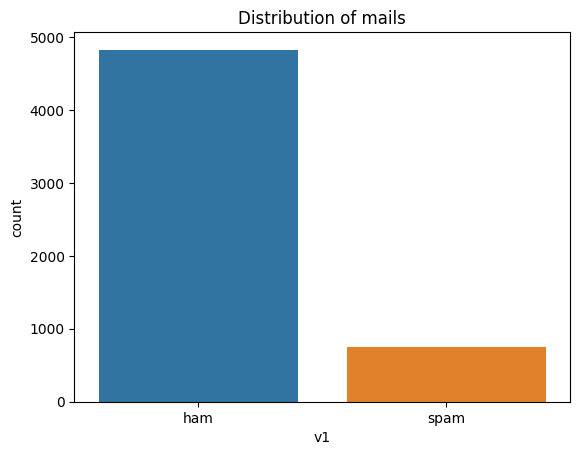

In [ ]:
sns.countplot(data=data, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [ ]:
data.loc[data["v1"] == "spam", "Category"] = 0
data.loc[data["v1"] == "ham", "Category"] = 1

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Category
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1.0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0.0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1.0


In [ ]:
X = data['v2']
Y = data['Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)



X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)



y_train = Y_train.astype(int)
y_test = Y_test.astype(int)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_features,y_train)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_features)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print("the accuracy of the spam sms model is :", (accuracy_score(y_test,y_pred))*100)
print("the accuracy of the spam sms model is :", (precision_score(y_test,y_pred))*100)

the accuracy of the spam sms model is : 95.99282296650718
the accuracy of the spam sms model is : 95.56291390728477
